# Plot the distriution of contact distances

In [1]:
import cooler
import numpy as np
import pandas as pd
import anndata
from pathlib import Path
from glob import glob
import xarray as xr

In [2]:
import matplotlib.pyplot as plt

In [3]:
root = Path("/tscc/projects/ps-epigen/users/biy022/scmethylhic/human_hippocampus/snm3c/Combined/hic")
contact_files_root = Path("/tscc/projects/ps-epigen/users/biy022/scmethylhic/human_hippocampus/snm3c/")

In [4]:
domain_dir = root / "domain_cluster_age"
oligo_dir = domain_dir / "Oligo"

## Oligo age group with downsampling

In [5]:
def create_dataset(contact_table_path):

    curr_contact_table = pd.read_csv(
        contact_table_path,
        names=["barcode", "path"],
        sep="\t",
        index_col=0
    )

    curr_contact_df_list = []
    for curr_contact_path in curr_contact_table["path"]:
        curr_contact_df = pd.read_csv(
            curr_contact_path, 
            header=None, 
            index_col=None, 
            sep="\t",
            names=["frag1", "chr1", "pos1", "strand1", "frag2", "chr2", "pos2", "strand2", "barcode"]
        )
        curr_contact_df_list.append(curr_contact_df)
    final_contact_df = pd.concat(curr_contact_df_list, axis=0)
    final_contact_df_cis = final_contact_df[
        final_contact_df["chr1"] == final_contact_df["chr2"]]
    final_contact_df_cis = final_contact_df_cis.assign(distance=lambda x: abs(x.pos1 - x.pos2))

    return final_contact_df_cis

In [6]:
# create contact table for 80100
test_age_dir = oligo_dir / "Age80100"
curr_cell_table = pd.read_csv(
    test_age_dir / "cell_table.csv", 
    names=["barcode", "path", "group"], 
    index_col=0
)

for barcode in curr_cell_table.index:
    donor_name = barcode.split("-")[0]
    curr_contact_path = contact_files_root / f"{donor_name}_deep" / "hic" / "raw" / f"{barcode}.3C.contact.tsv.gz"
    curr_cell_table["path"][barcode] = str(curr_contact_path)

del curr_cell_table["group"]
curr_cell_table.to_csv(
    test_age_dir / "contact_table.tsv",
    sep="\t",
    header=False,
    index=True
)

In [7]:
contact_df_2040_down = create_dataset(
    oligo_dir / "Age2040_DOWN" / "impute" / "contact_table_rmbkl.tsv")

In [8]:
contact_df_4060_down = create_dataset(
    oligo_dir / "Age4060_DOWN" / "impute" / "contact_table_rmbkl.tsv")

In [9]:
contact_df_6080_down = create_dataset(
    oligo_dir / "Age6080_DOWN" / "impute" / "contact_table_rmbkl.tsv")

In [7]:
contact_df_80100 = create_dataset(
    oligo_dir / "Age80100" / "contact_table.tsv")

In [11]:
print(contact_df_2040_down.shape)
print(contact_df_4060_down.shape)
print(contact_df_6080_down.shape)
print(contact_df_80100.shape)

(155020759, 10)
(155487001, 10)
(157756432, 10)
(165611686, 10)


In [30]:
common_bins = np.arange(2, 9, 0.007)

In [31]:
contact_df_2040_down_freq, _ = np.histogram(np.log10(contact_df_2040_down["distance"]), bins=common_bins)
contact_df_2040_down_freq = contact_df_2040_down_freq / np.sum(contact_df_2040_down_freq)

In [32]:
contact_df_4060_down_freq, _ = np.histogram(np.log10(contact_df_4060_down["distance"]), bins=common_bins)
contact_df_4060_down_freq = contact_df_4060_down_freq / np.sum(contact_df_4060_down_freq)

In [33]:
contact_df_6080_down_freq, _ = np.histogram(np.log10(contact_df_6080_down["distance"]), bins=common_bins)
contact_df_6080_down_freq = contact_df_6080_down_freq / np.sum(contact_df_6080_down_freq)

In [34]:
contact_df_80100_freq, _ = np.histogram(np.log10(contact_df_80100["distance"]), bins=common_bins)
contact_df_80100_freq = contact_df_80100_freq / np.sum(contact_df_80100_freq)

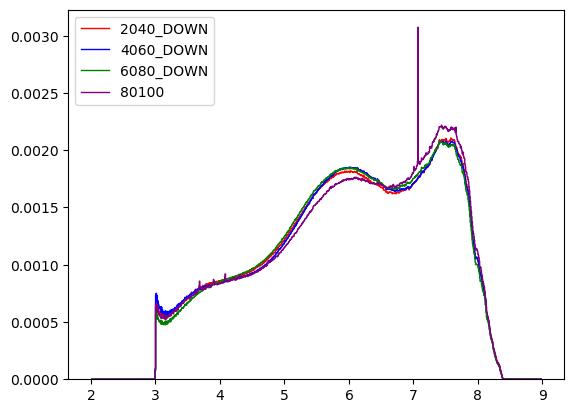

In [35]:
fig, axs = plt.subplots()
axs.stairs(contact_df_2040_down_freq, common_bins, color="red", label="2040_DOWN")
axs.stairs(contact_df_4060_down_freq, common_bins, color="blue", label="4060_DOWN")
axs.stairs(contact_df_6080_down_freq, common_bins, color="green", label="6080_DOWN")
axs.stairs(contact_df_80100_freq, common_bins, color="purple", label="80100")
axs.legend(loc="upper left")
plt.show()

In [41]:
print(common_bins[1:][contact_df_80100_freq > 0.003])
print(common_bins[0:-1][contact_df_80100_freq > 0.003])

[7.075]
[7.068]


In [48]:
len(contact_df_80100.barcode[
    (np.log10(contact_df_80100["distance"]) > 7.068) & (np.log10(contact_df_80100["distance"]) < 7.075)])

509036

(array([8.63050e+04, 8.40620e+04, 8.13640e+04, 7.93160e+04, 7.72600e+04,
        7.51260e+04, 7.40510e+04, 7.78550e+04, 7.52180e+04, 7.43720e+04,
        7.19820e+04, 7.04920e+04, 7.42670e+04, 7.26790e+04, 7.12530e+04,
        6.99700e+04, 6.93310e+04, 6.80880e+04, 7.13690e+04, 7.01660e+04,
        6.88070e+04, 6.87970e+04, 7.18410e+04, 6.56980e+04, 6.90570e+04,
        6.84480e+04, 6.74990e+04, 7.06780e+04, 6.99710e+04, 6.89360e+04,
        6.81290e+04, 6.84260e+04, 7.11230e+04, 7.02560e+04, 7.03800e+04,
        6.89620e+04, 7.15070e+04, 6.71950e+04, 7.34660e+04, 7.00440e+04,
        6.90390e+04, 7.13520e+04, 7.12590e+04, 7.46900e+04, 6.99630e+04,
        7.27170e+04, 7.24080e+04, 7.50260e+04, 7.42250e+04, 7.34530e+04,
        7.27710e+04, 7.24840e+04, 7.57340e+04, 7.49600e+04, 7.71780e+04,
        7.64300e+04, 7.55840e+04, 7.49130e+04, 7.75800e+04, 7.72230e+04,
        7.67590e+04, 8.07820e+04, 7.81610e+04, 7.75230e+04, 7.99300e+04,
        7.94700e+04, 8.22070e+04, 7.85400e+04, 8.27

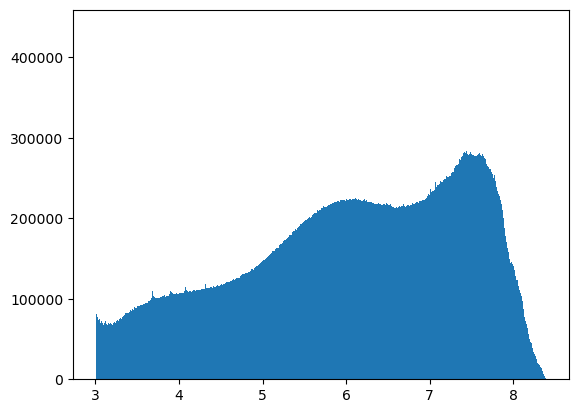

In [11]:
plt.hist(np.log10(contact_df_80100["distance"]), bins=1000)